## Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading the model

In [5]:
model = tf.keras.models.load_model('trained_model.keras')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

### Visualising Single image of Test set

In [10]:
!pip install opencv-python

### Paste the path of the image for testing

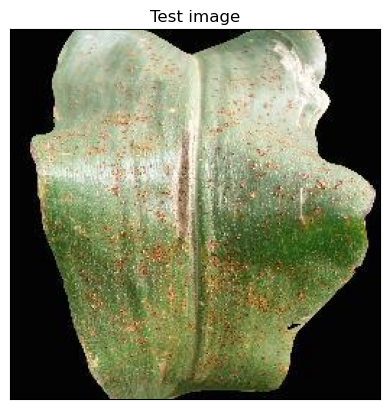

In [13]:
import cv2
image_path = "test/test/CornCommonRust2.JPG"
#Read the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert bgr image to rgb

#Displaying the image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing model

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array]) #Converts single image to a batch
print(input_array.shape)

(1, 128, 128, 3)


In [18]:
prediction = model.predict(input_array)
prediction, prediction.shape

1/1 [==============================] - 0s 84ms/step


2025-05-08 19:24:01.037378: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(array([[8.00026521e-24, 1.46497919e-20, 2.45682939e-24, 1.78747654e-26,
         6.93842147e-27, 1.37169846e-26, 3.50083823e-22, 1.19775825e-20,
         1.00000000e+00, 1.95458901e-25, 6.79211335e-26, 3.33894092e-31,
         7.30411700e-29, 5.50311686e-30, 1.36592188e-28, 4.30523728e-28,
         3.43782378e-26, 4.08100222e-28, 3.37649976e-21, 2.45966630e-20,
         2.57341195e-22, 4.71138251e-35, 2.20719081e-24, 1.57633495e-27,
         2.86909756e-29, 4.40214906e-32, 4.12889120e-26, 9.53445760e-32,
         4.22615158e-30, 7.19943896e-22, 1.84316975e-18, 5.67052597e-32,
         2.30219551e-28, 0.00000000e+00, 7.50945100e-31, 1.45273822e-32,
         2.53681783e-33, 2.18834191e-26]], dtype=float32),
 (1, 38))

In [20]:
result_index = np.argmax(prediction)
result_index

8

In [22]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

### Displaying result of disease prediction

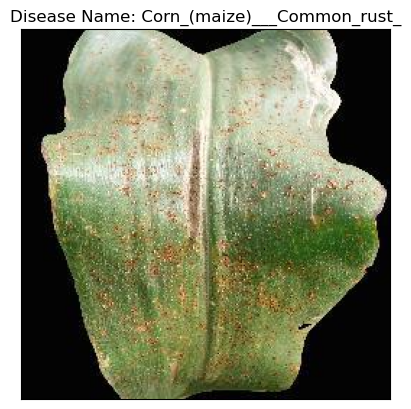

In [25]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
model_prediction

'Corn_(maize)___Common_rust_'